In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [56]:
#import yfinance as yf
import pandas_datareader.data as pdr
from datetime import datetime, time
import requests

In [57]:
pd.options.mode.copy_on_write = True 

In [58]:
today = datetime.now().date()
today_formatted = today.strftime("%Y-%m-%d")
n_year_ago = today.replace(year= today.year-25)
n_year_ago_formatted = n_year_ago.strftime("%Y-%m-%d")


In [59]:
API_KEY = "1bf964632306ad3e51bcf2ea7f99cf10"
base_url = "https://financialmodelingprep.com/stable/historical-price-eod/full"
#https://financialmodelingprep.com/stable/historical-price-eod/full?symbol=AAPL&apikey=1bf964632306ad3e51bcf2ea7f99cf10

In [60]:
def get_jsonparsed_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"failed tpfetch data from {url}")
        return None
    
def fetch(symbol, start, end):
    url = f'{base_url}?symbol={symbol}&from={start}&to={end}&apikey={API_KEY}'
    data = get_jsonparsed_data(url)
    if data is not None:
        df = pd.DataFrame(data)
        return df
    else:
        return None
    


In [61]:

data = fetch('NVDA',n_year_ago_formatted, today_formatted)
data.tail()

,symbol,date,open,high,low,close,volume,change,changePercent,vwap
6282,NVDA,2000-10-09,0.27787,0.29583,0.25833,0.29141,665256000,0.013542,4.87,0.28086
6283,NVDA,2000-10-06,0.30495,0.30703,0.28099,0.28516,1027219319,-0.019792,-6.49,0.29453
6284,NVDA,2000-10-05,0.31380,0.31380,0.29766,0.30417,525048000,-0.009635,-3.07,0.30736
6285,NVDA,2000-10-04,0.30677,0.31667,0.30261,0.31146,419568000,0.004687,1.53,0.30938
6286,NVDA,2000-10-03,0.33490,0.33750,0.31250,0.31511,300264000,-0.019792,-5.91,0.32500


In [62]:
#Formatting the Dataframe
df = data.set_index('date')
df.head(20)

,symbol,open,high,low,close,volume,change,changePercent,vwap
date,,,,,,,,,
2025-10-02,NVDA,189.60,191.05,188.265,189.60,79417067,0.00,0.000000,189.6400
2025-10-01,NVDA,185.24,188.14,183.900,187.24,173844901,2.00,1.080000,186.1300
2025-09-30,NVDA,182.08,187.35,181.480,186.58,236981032,4.50,2.470000,184.3725
2025-09-29,NVDA,180.43,184.00,180.320,181.85,193063500,1.42,0.787010,181.6500
2025-09-26,NVDA,178.17,179.77,174.930,178.19,148573732,0.02,0.011225,177.7650
2025-09-25,NVDA,174.48,180.26,173.130,177.69,191586733,3.21,1.840000,176.3900
2025-09-24,NVDA,179.77,179.78,175.400,176.97,143564116,-2.80,-1.560000,177.9800
2025-09-23,NVDA,181.97,182.42,176.210,178.43,192559600,-3.54,-1.950000,179.7575
2025-09-22,NVDA,175.30,184.55,174.710,183.61,269637001,8.31,4.740000,179.5425


In [63]:
selected_columns = ['symbol', 'close', 'changePercent']
new_df = df[selected_columns]
new_df.head()

,symbol,close,changePercent
date,,,
2025-10-02,NVDA,189.60,0.000000
2025-10-01,NVDA,187.24,1.080000
2025-09-30,NVDA,186.58,2.470000
2025-09-29,NVDA,181.85,0.787010
2025-09-26,NVDA,178.19,0.011225


In [64]:
loopback_period = 150

In [84]:
def abs_momentum(new_df, loopback_period):
    new_df.loc[:,'loopback_ema'] = new_df.loc[:,'close'].ewm(span=loopback_period).mean()
    #Generate signal
    new_df.loc[:,'buy'] = (new_df.loc[:,'close'] > new_df.loc[:,'loopback_ema']) 
    new_df.loc[:,'sell'] = (new_df.loc[:,'close'] < new_df.loc[:,'loopback_ema'])
    
    #Buy securities when buy =1, sell = -1 or hold =0
    new_df.loc[:,'signal'] = np.where(new_df.loc[:,'buy']==True, 1, np.where(new_df.loc[:,'sell']==True, -1,0))

    #calculate daily returns of the strategy
    new_df.loc[:,'returns'] = new_df.loc[:,'signal'].shift(-1) * new_df.loc[:,'changePercent']
    new_df.loc[:,'returns+1'] = 1+ new_df.loc[:,'returns']

    #calculate cumulative return of teh startegy
    print(new_df.loc[:,'returns'].cumprod())
    new_df.loc[:, 'cumulative_returns'] = (1+ new_df.loc[:,'returns']).cumprod(skipna=True)

    #print all the returns and final returns
    print('Final returns :', new_df['cumulative_returns'].iloc[0]-1)
    return new_df
    
    



In [82]:
df = abs_momentum(new_df, loopback_period)


date
2025-10-02   -0.0
2025-10-01    0.0
2025-09-30   -0.0
2025-09-29    0.0
2025-09-26   -0.0
             ... 
2000-10-09    0.0
2000-10-06   -0.0
2000-10-05    0.0
2000-10-04    0.0
2000-10-03    NaN
Name: returns, Length: 6287, dtype: float64
Final returns : 0.0


In [83]:
df.tail(20)

,symbol,close,changePercent,loopback_ema,buy,sell,signal,returns,returns+1,cumulative_returns
date,,,,,,,,,,
2000-10-30,NVDA,0.23724,-5.50,0.248956,False,True,-1,-5.50,-4.50,-0.0
2000-10-27,NVDA,0.25521,-2.39,0.249039,True,False,1,-2.39,-1.39,0.0
2000-10-26,NVDA,0.26120,3.62,0.249200,True,False,1,3.62,4.62,0.0
2000-10-25,NVDA,0.25052,-6.15,0.249218,True,False,1,-6.15,-5.15,-0.0
2000-10-24,NVDA,0.27448,-2.77,0.249552,True,False,1,-2.77,-1.77,0.0
2000-10-23,NVDA,0.28360,-3.03,0.250003,True,False,1,-3.03,-2.03,-0.0
2000-10-20,NVDA,0.29011,11.96,0.250534,True,False,1,11.96,12.96,-0.0
2000-10-19,NVDA,0.26537,3.04,0.250731,True,False,1,-3.04,-2.04,0.0
2000-10-18,NVDA,0.24193,5.21,0.250614,False,True,-1,-5.21,-4.21,-0.0


In [85]:
df

,symbol,close,changePercent,loopback_ema,buy,sell,signal,returns,returns+1,cumulative_returns
date,,,,,,,,,,
2025-10-02,NVDA,189.60000,0.000000,189.600000,False,False,0,-0.000000,1.000000,1.000000
2025-10-01,NVDA,187.24000,1.080000,188.412133,False,True,-1,-1.080000,-0.080000,-0.080000
2025-09-30,NVDA,186.58000,2.470000,187.793261,False,True,-1,-2.470000,-1.470000,0.117600
2025-09-29,NVDA,181.85000,0.787010,186.277599,False,True,-1,-0.787010,0.212990,0.025048
2025-09-26,NVDA,178.19000,0.011225,184.616659,False,True,-1,-0.011225,0.988775,0.024766
...,...,...,...,...,...,...,...,...,...,...
2000-10-09,NVDA,0.29141,4.870000,0.252182,True,False,1,4.870000,5.870000,-0.000000
2000-10-06,NVDA,0.28516,-6.490000,0.252619,True,False,1,-6.490000,-5.490000,0.000000
2000-10-05,NVDA,0.30417,-3.070000,0.253302,True,False,1,-3.070000,-2.070000,-0.000000


In [31]:
import plotly.graph_objs as go

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['cumulative_returns'], mode='lines'))
fig.update_layout(autosize = True, minreducedwidth = 250, minreducedheight = 100,
                      width = 1200, height = 500,
                      title = f'Cumulative returns ',
                      xaxis_title = 'year',yaxis_title = "Cumulative Return",
                      showlegend = True)
    
fig.show()

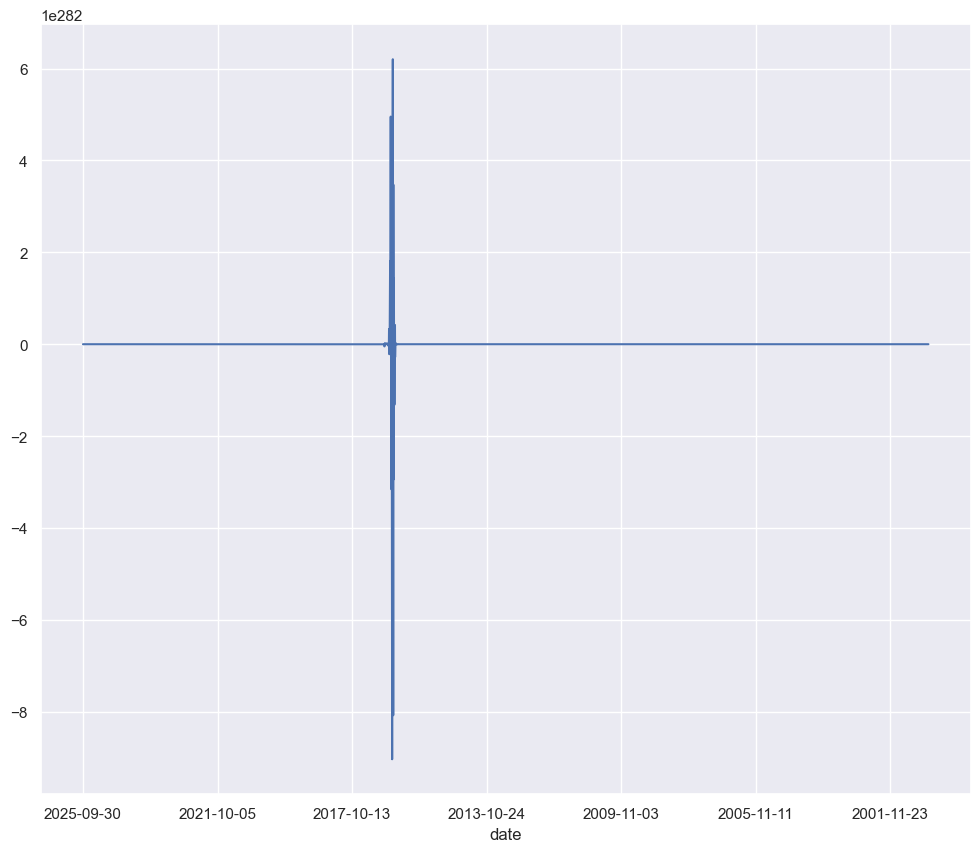

In [30]:
#Graph
df.loc[:,'cumulative_returns'].plot(figsize=(12,10))
plt.show()